Clone `onnx/models` and then pull all ONNX models to some folder (~50GB at the time of writing)

`git clone https://github.com/onnx/models.git`

`git lfs pull --include="*.onnx" --exclude=""`


In [1]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib
import onnx
import matplotlib.pyplot as plt

In [2]:
PATH = Path("C:/ONNX/models")

In [3]:
models = []

for area in ["text", "vision"]:
    for problem in os.scandir(PATH / area):
        for model in os.scandir(PATH / area / problem):
            for root, _, files in os.walk(PATH / area / problem / model):
                for file in files:
                    if file.endswith('.onnx'):
                        file_path = os.path.join(root, file)
                        models.append({
                            "area": area,
                            "problem": problem.name,
                            "model": model.name,
                            "version": file,
                            "size": os.path.getsize(file_path),
                            "path": file_path
                        })
        
models = pd.DataFrame(models)

In [4]:
models.sort_values("size", ascending=False)

,area,problem,model,version,size,path
6,text,machine_comprehension,gpt-2,gpt2-lm-head-10.onnx,664871060,C:\ONNX\models\text\machine_comprehension\gpt-...
7,text,machine_comprehension,gpt2-bs,gpt2-lm-head-bs-12.onnx,664855867,C:\ONNX\models\text\machine_comprehension\gpt2...
10,text,machine_comprehension,t5,t5-decoder-with-lm-head-12.onnx,650564941,C:\ONNX\models\text\machine_comprehension\t5\m...
116,vision,classification,vgg,vgg19-bn-7.onnx,574774380,C:\ONNX\models\vision\classification\vgg\model...
115,vision,classification,vgg,vgg19-7.onnx,574677321,C:\ONNX\models\vision\classification\vgg\model...
...,...,...,...,...,...,...
65,vision,classification,mnist,mnist-1.onnx,27266,C:\ONNX\models\vision\classification\mnist\mod...
68,vision,classification,mnist,mnist-7.onnx,26454,C:\ONNX\models\vision\classification\mnist\mod...
69,vision,classification,mnist,mnist-8.onnx,26454,C:\ONNX\models\vision\classification\mnist\mod...
67,vision,classification,mnist,mnist-12.onnx,26143,C:\ONNX\models\vision\classification\mnist\mod...


In [78]:
model_ops = []

for index, row in tqdm(models.iterrows()):
    model = onnx.load(row["path"])
    ops_present = set()

    for node in model.graph.node:
        ops_present.add(node.op_type)
    
    model_ops.append([row["version"]] + list(ops_present))

    #break

#pd.DataFrame(nodes).value_counts()

168it [00:39,  4.30it/s]


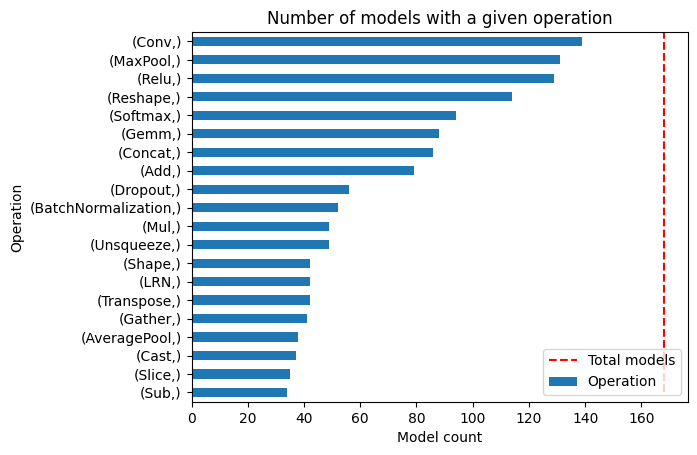

In [79]:
pd.DataFrame(sum(model_ops, [])).value_counts(ascending=True).tail(20).plot.barh(label="Operation")
plt.title("Number of models with a given operation")
plt.xlabel("Model count");
plt.ylabel("Operation")
plt.vlines(len(models), 0, 20, colors="red", linestyles="dashed", label="Total models")
plt.legend();

[['vgg_ilsvrc_16_age_chalearn_iccv2015.onnx'],
 ['vgg_ilsvrc_16_age_imdb_wiki.onnx'],
 ['vgg_ilsvrc_16_gender_imdb_wiki.onnx'],
 ['emotion-ferplus-2.onnx'],
 ['emotion-ferplus-7.onnx'],
 ['emotion-ferplus-8.onnx'],
 ['mnist-1.onnx'],
 ['mnist-12.onnx'],
 ['mnist-7.onnx'],
 ['mnist-8.onnx'],
 ['vgg19-caffe2-3.onnx'],
 ['vgg19-caffe2-6.onnx'],
 ['vgg19-caffe2-7.onnx'],
 ['vgg19-caffe2-8.onnx'],
 ['vgg19-caffe2-9.onnx'],
 ['bvlcalexnet-12.onnx', 'LRN'],
 ['bvlcalexnet-3.onnx', 'LRN'],
 ['bvlcalexnet-6.onnx', 'LRN'],
 ['bvlcalexnet-7.onnx', 'LRN'],
 ['bvlcalexnet-8.onnx', 'LRN'],
 ['bvlcalexnet-9.onnx', 'LRN'],
 ['caffenet-12.onnx', 'LRN'],
 ['caffenet-3.onnx', 'LRN'],
 ['caffenet-6.onnx', 'LRN'],
 ['caffenet-7.onnx', 'LRN'],
 ['caffenet-8.onnx', 'LRN'],
 ['caffenet-9.onnx', 'LRN'],
 ['inception-v2-3.onnx', 'AveragePool'],
 ['inception-v2-6.onnx', 'AveragePool'],
 ['rcnn-ilsvrc13-3.onnx', 'LRN'],
 ['rcnn-ilsvrc13-6.onnx', 'LRN'],
 ['rcnn-ilsvrc13-7.onnx', 'LRN'],
 ['rcnn-ilsvrc13-8.onnx', 

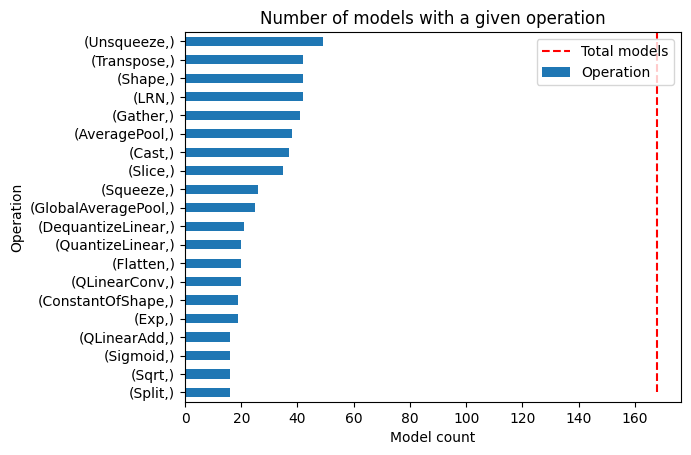

In [94]:
implemented = [
    "Add",
    "BatchNormalization",
    "Concat",
    "Constant",
    "Conv",
    "Div",
    "Dropout",
    "Gemm",
    "MatMul",
    "MaxPool",
    "Mul",
    "Relu",
    "Reshape",
    "Softmax",
    "Sub",
    "Sum"
    "Transpose",
]

filtered = [list(filter(lambda op: op not in implemented, l)) for l in model_ops]
filtered.sort(key=lambda x: len(x))

pd.DataFrame(sum(filtered, [])).value_counts(ascending=True).tail(20).plot.barh(label="Operation")
plt.title("Number of models with a given operation")
plt.xlabel("Model count");
plt.ylabel("Operation")
plt.vlines(len(models), 0, 20, colors="red", linestyles="dashed", label="Total models")
plt.legend();

filtered